What to do?
You should aim for:
Exploratory data analysis
Get to know the domain
Explore your data
Clean your data
Take a look and find connections between data
Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume

Visualization
Plot your data in a meaningful way
Predictions
Do you have any hypothesis?
Can you make any kind of prediction: regression and/or classification?
Storytelling
What metrics are you obtaining?
Explain your conclusions
Shape your new data and conclusions in such a way that is appealing to the listener and tells a story
Extra:
Enrich your dataset
Add value: obtain related data by web scraping or with APIs.
Database
Load the processed information into a database


# Ironhack Final Tech Challenge for DA


In [1]:
%pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore error
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the data from data file in repo 
dataset_1 = pd.read_csv('data/measurements.csv', sep = ',',header=0)
dataset_1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
# Import measurements2.xlsx

dataset_2 = pd.read_excel('data/measurements2.xlsx',header=0)
dataset_2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [5]:
# Distance convert string , to float (exp: 11,5 -> 11.5 )
# Dtype between two dataset are differnt for some columns: 
# Convert columns to float: distance, consume, temp_inside,  refill liters
# Convert to then compare between two dataset
dataset_1['distance'] = dataset_1['distance'].str.replace(',','.').astype(float)
dataset_1['consume'] = dataset_1['consume'].str.replace(',','.').astype(float)
dataset_1['temp_inside'] = dataset_1['temp_inside'].str.replace(',','.').astype(float)
dataset_1['refill liters'] = dataset_1['refill liters'].str.replace(',','.').astype(float)
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [6]:
# Check if dataset_1 and dataset_2 are the same dataset or not 
dataset_1.equals(dataset_2)
# Dataset_1 and dataset_2 are the same dataset, we will work with Dataset_2 since its easier


True

## EDA

### Columns explaining
- Distance: Distance Travelled in Km
- Consume: Gas consumed in L
- Speed: Velocity in KM/Hr
- Temp_inside/Temp_outside: Temp in/out of vehicle respectively in Celcious
- Specials: Main description of weather condition of trip
- AC,rain,sun: Specific description of weather condition of trip
- refill liters: Gas refuled in L 
- refill gas,gas_type: What type of gas is used

In [7]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [8]:
dataset_2.head(5)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


#### Looking at specials, we see this is main descriptors of the weather conidtions -> We can clean this into standarized conditions in order to use it into AC, rain, sun later
- High number of NaNs -> We can assume this as the condition of weather is Normal

In [9]:
# merged_data['specials'].value_counts() # Clean the value of specials column
dict = {'ac': 'AC', 'sun ac': 'AC sun', 'AC Sun': 'AC sun','ac rain': 'AC rain', 'half rain half sun':'rain-sun'}
dataset_2['specials'] = dataset_2['specials'].replace(dict)
dataset_2['specials'] = dataset_2['specials'].fillna('None')
dataset_2['specials'].value_counts()

specials
None        295
rain         32
sun          27
AC           14
AC rain      10
AC sun        5
snow          3
AC snow       1
rain-sun      1
Name: count, dtype: int64

#### Converting special weather condition of rain-sun (rain = 1 + sun = 1) and snow as a new column 

In [10]:
dataset_2.loc[dataset_2['specials'] == 'rain-sun', 'sun'] = 1
dataset_2[dataset_2['specials'] == 'rain-sun'].head()


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
191,43.7,4.7,44,22.0,9,rain-sun,SP98,0,1,1,10.0,SP98


In [11]:
# Add snow as a column -> where special == AC snow -> AC =1 and snow =1 
dataset_2['snow'] = 0
dataset_2.loc[dataset_2['specials'] == 'AC snow', 'snow'] = 1
dataset_2.loc[dataset_2['specials'] == 'snow', 'snow'] = 1
dataset_2[dataset_2['specials'] == 'snow'].head()
# After adding snow column, we can drop specials column
dataset_2 = dataset_2.drop(columns=['specials'])


#### refill liters	refill gas has a lot of Nan and refill gas provide the same information as gas_type so we can remove these two columns

In [12]:
# Check to make sure that gas_type and refill gas are the same
dataset_2[(dataset_2['gas_type'] != dataset_2['refill gas']) & (~pd.isna(dataset_2['refill gas']))].head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow


In [13]:
# Drop columns refill gas
dataset_2.drop(columns=['refill liters','refill gas'], inplace=True)
dataset_2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow
0,28.0,5.0,26,21.5,12,E10,0,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0


In [14]:
# Percentage of missing value in each column
missing_data = dataset_2.isnull().mean()*100
missing_data

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     3.092784
temp_outside    0.000000
gas_type        0.000000
AC              0.000000
rain            0.000000
sun             0.000000
snow            0.000000
dtype: float64

In [15]:
# Temp_inside still has missing value, we will fill missing value with mode value of temp_inside
dataset_2['temp_inside'].fillna(dataset_2['temp_inside'].mode()[0], inplace=True)
dataset_2.isnull().mean()*100

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
AC              0.0
rain            0.0
sun             0.0
snow            0.0
dtype: float64

### Create new Features

In [16]:
# Create new columns as temp difference between inside and outside called temp_diff
dataset_2['temp_diff'] = dataset_2['temp_outside'] - dataset_2['temp_inside']
# Create new columns as consume per distance called litter_per_km
dataset_2['litter_per_km'] = dataset_2['consume'] / dataset_2['distance']
# Create new columns as time spent on driving called time_spent in hours
dataset_2['time_spent'] = dataset_2['distance'] / dataset_2['speed']
# Reorder columns
dataset_2 = dataset_2[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'temp_diff',  'AC', 'rain', 'sun', 'snow','gas_type','litter_per_km', 'time_spent']]
dataset_2.head()

,distance,consume,speed,temp_inside,temp_outside,temp_diff,AC,rain,sun,snow,gas_type,litter_per_km,time_spent
0,28.0,5.0,26,21.5,12,-9.5,0,0,0,0,E10,0.178571,1.076923
1,12.0,4.2,30,21.5,13,-8.5,0,0,0,0,E10,0.350000,0.400000
2,11.2,5.5,38,21.5,15,-6.5,0,0,0,0,E10,0.491071,0.294737
3,12.9,3.9,36,21.5,14,-7.5,0,0,0,0,E10,0.302326,0.358333
4,18.5,4.5,46,21.5,15,-6.5,0,0,0,0,E10,0.243243,0.402174


In [17]:
dataset_2.dtypes
# Seperate into numerical and categorical columns
numerical_cols = dataset_2.select_dtypes(np.number)
categorical_cols = dataset_2.select_dtypes(object)
numerical_cols.describe().T
# save the cleaned data to a new file
dataset_2.to_csv('data/cleaned_data.csv', index=False)

In [18]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   temp_diff      388 non-null    float64
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   snow           388 non-null    int64  
 10  gas_type       388 non-null    object 
 11  litter_per_km  388 non-null    float64
 12  time_spent     388 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 39.5+ KB


### Visualization
Plot your data in a meaningful way

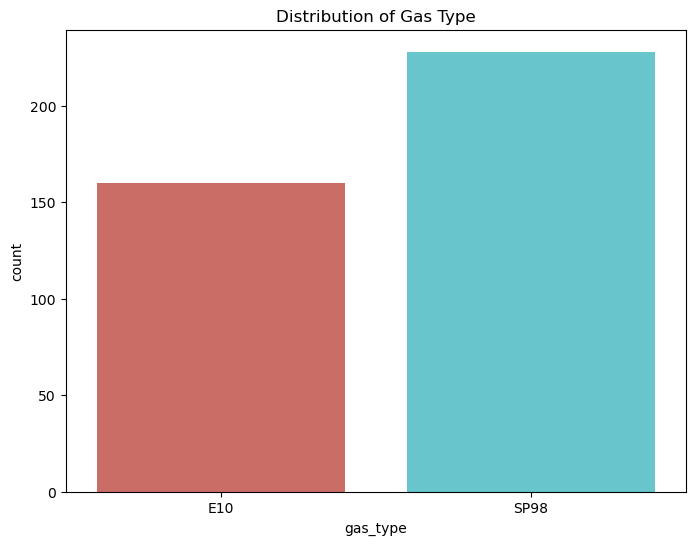

In [19]:
# Displaying distribution of gas type
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset_2, x='gas_type',hue='gas_type', palette='hls')
plt.title('Distribution of Gas Type')
plt.show()

#### More trips use SP98, however, the difference between the counts is not too much

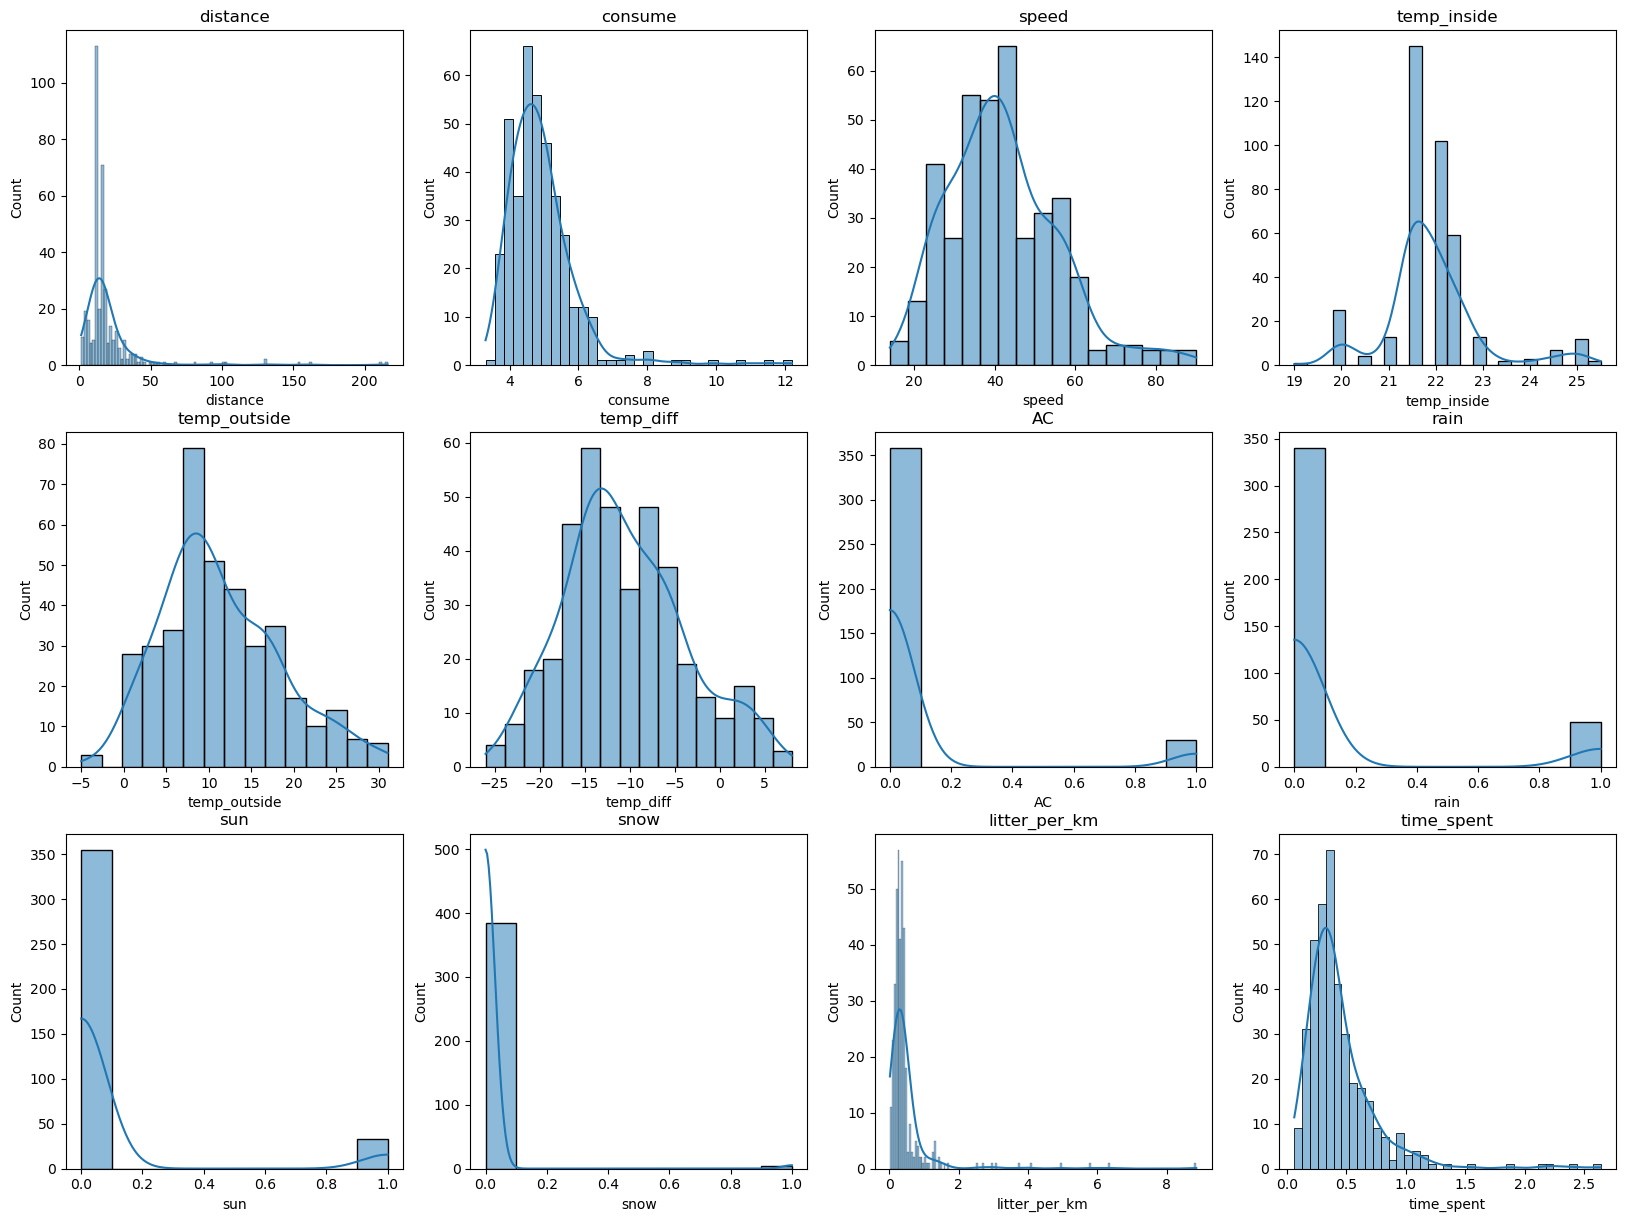

In [20]:
# Plotting distribution of different columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(numerical_cols[col], kde=True)
    plt.title(col)

Text(0.5, 1.0, 'temp_outside & consume')

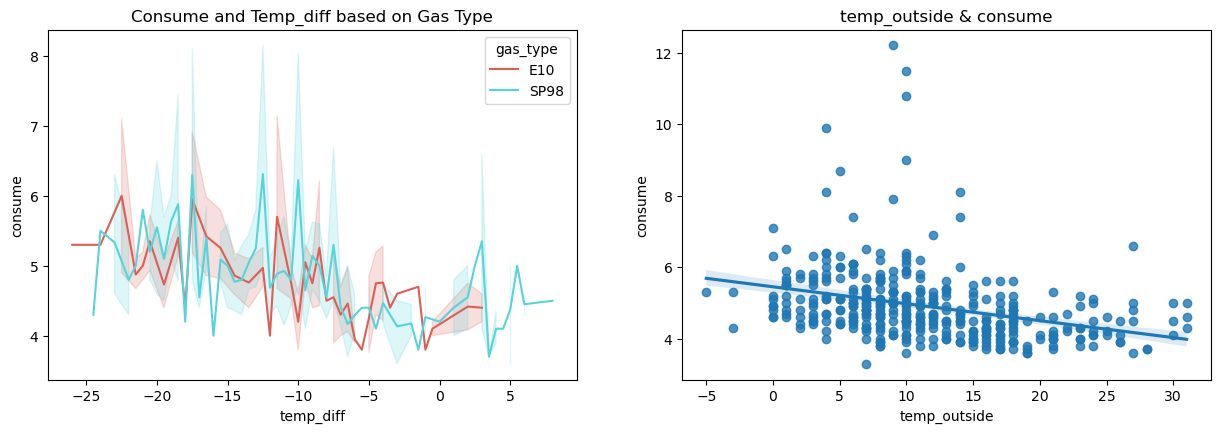

In [35]:
# Line Graph of consume and temp_diff based on gas_type
plt.figure(figsize=(15,10))

ax1=plt.subplot(2,2,1)
sns.lineplot(data=dataset_2, x='temp_diff', y='consume',hue='gas_type', palette='hls', ax=ax1)
plt.title('Consume and Temp_diff based on Gas Type')

ax2=plt.subplot(2,2,2)
sns.regplot(x=dataset_2['temp_outside'], y=dataset_2['consume'],ax=ax2)
plt.xlabel("temp_outside")
plt.ylabel("consume")
plt.title("temp_outside & consume")

#### We see that, when theres a lot of temp_diff (its a lot colder outside compare to inside the vehicle), the consume of fuel is a lot higher. This is especially more noticeable when the temp_outside is colder

Text(0.5, 1.0, 'Distance and Litter_per_km based on Gas Type')

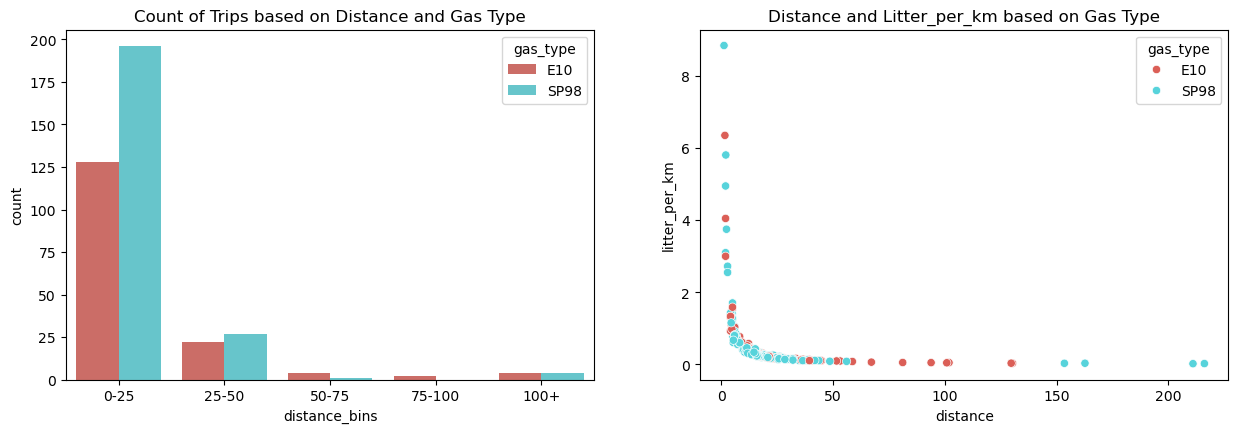

In [52]:
# Graph of count of trips and distance based on gas_type
# Bin distance into 5 bins: 0-25, 25-50, 50-75, 75-100, 100+
plt.figure(figsize=(15,10))

ax1=plt.subplot(2,2,1)
dataset_2['distance_bins'] = pd.cut(dataset_2['distance'], bins=[0, 25, 50, 75, 100, np.inf], labels=['0-25', '25-50', '50-75', '75-100', '100+'])
sns.countplot(data=dataset_2, x='distance_bins', hue='gas_type', palette='hls', ax=ax1)
plt.title('Count of Trips based on Distance and Gas Type')

ax2=plt.subplot(2,2,2)
sns.scatterplot(data=dataset_2, x='distance', y='litter_per_km', hue='gas_type', palette='hls', ax=ax2)
plt.title('Distance and Litter_per_km based on Gas Type')

#### We see that in the amount of trip, the closer trip (0-25,25-50) are more leaning toward SP98. We can also see that the fuel consumption rate are way higher with the lower distance and the rate become way lower and also more stable 

Text(0.5, 1.0, 'Litter per km and Speed based on Gas Type')

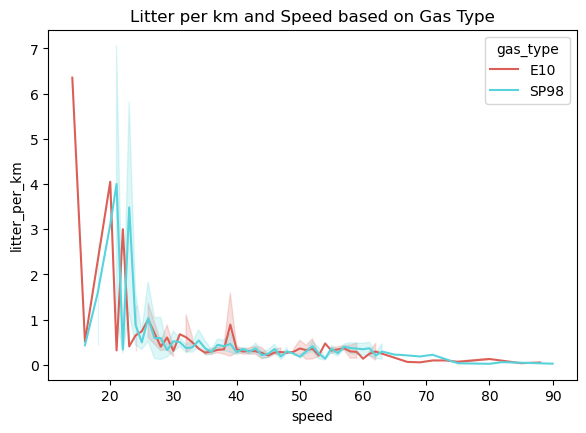

In [24]:
# Graph of litter_per_km and speed based on gas_type
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.lineplot(data=dataset_2, x='speed', y='litter_per_km',hue='gas_type', palette='hls', ax=ax1)
plt.title('Litter per km and Speed based on Gas Type')


#### We see that the faster the speed, the less fuel is used per km and also at the speed around 20-25 and below, the fuel usage for both gas type show peaks . In addition,we see that SP98 has a high 95% confidence interval especially around 20-25 km/h

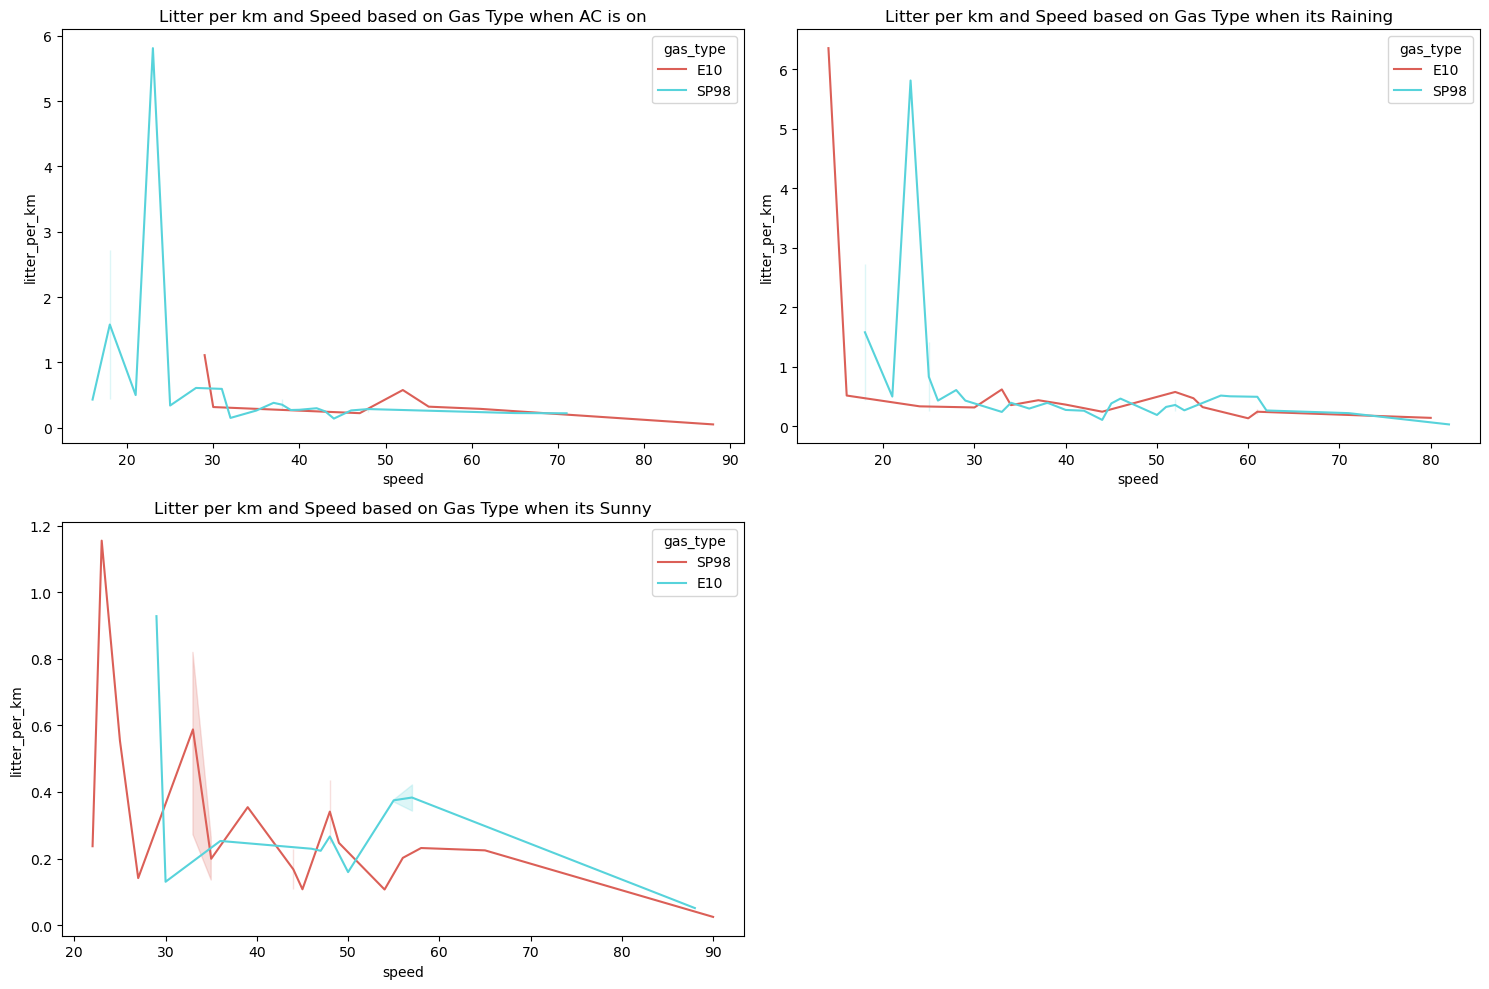

In [38]:
# Graph of litter_per_km and speed based on gas_type for different conditions
plt.figure(figsize=(15,10))

# Graph when AC = 1
ax1=plt.subplot(2,2,1)
sns.lineplot(data=dataset_2[dataset_2['AC'] == 1], x='speed', y='litter_per_km',hue='gas_type', palette='hls', ax=ax1)
plt.title('Litter per km and Speed based on Gas Type when AC is on')

# Graph when rain = 1
ax2=plt.subplot(2,2,2)
sns.lineplot(data=dataset_2[dataset_2['rain'] == 1], x='speed', y='litter_per_km',hue='gas_type', palette='hls', ax=ax2)
plt.title('Litter per km and Speed based on Gas Type when its Raining')

# Graph when sun = 1
ax3=plt.subplot(2,2,3)
sns.lineplot(data=dataset_2[dataset_2['sun'] == 1], x='speed', y='litter_per_km',hue='gas_type', palette='hls', ax=ax3)
plt.title('Litter per km and Speed based on Gas Type when its Sunny')

plt.tight_layout()
plt.show()

#### When examing the same graph under special conditions, we can see that at the speed around 20-25, we see that SP98 used a lot more fuel, especially when the AC is on or when it is raining

Text(0.5, 1.0, 'Distribution of Time Spent on Driving based on Gas Type')

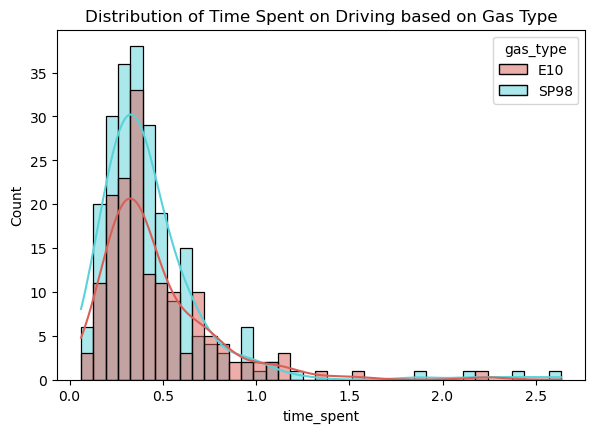

In [26]:
# Graph comparing distribution of time spent on driving based on gas_type
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.histplot(data=dataset_2, x='time_spent', hue='gas_type', palette='hls', kde=True, ax=ax1)
plt.title('Distribution of Time Spent on Driving based on Gas Type')


#### We see that overall, the time_spent distribution of both gas types are similar, however, SP98 has been used more frequently and used more in longer trip

### Hypothesis Testing:
Do you have any hypothesis? P-val threshold: 0.05

In [41]:
# Hypothesis Testing: two fuel type have the same average litter per km
# Null Hypothesis: two fuel type have the same average litter per km
# Alternative Hypothesis: two fuel type have different average litter per km
from scipy.stats import ttest_ind
stat,pval = ttest_ind(dataset_2[dataset_2['gas_type'] == 'SP98']['litter_per_km'], dataset_2[dataset_2['gas_type'] == 'E10']['litter_per_km'])
stat,pval

(0.8815135946749462, 0.37858846826220593)

#### P-val in this hypo testing is over the threshold, so we can say that two fuel type have the same litter per km consumption. 

In [44]:
# 2nd Hypothesis Testing: the temperature difference between inside and outside has an effect on the average consume
# Null Hypothesis: the temperature difference < 0 have the same consume with temperature difference >= 0
# Alternative Hypothesis: the temperature difference < 0 have higher consume with temperature difference >= 0
# Perform the t-test
stat, pval = ttest_ind(
    dataset_2[dataset_2['temp_diff'] < 0]['consume'],
    dataset_2[dataset_2['temp_diff'] >= 0]['consume'],
    alternative='greater'
)

# Output the results
print(f'T-statistic: {stat}, P-value: {pval}')

T-statistic: 2.9700468919143677, P-value: 0.0015818037782433327


#### P-val in this hypo-testing is 0.001, under the threshold, so therefore we can say that the temperature difference between inside and outside has affect on fuel consume and the temperature difference < 0 has higher consumption of fuel

In [47]:
# 3rd Hypothesis Testing: the speed has an effect on the average litter_per_km
# Null Hypothesis: the speed < 30 have the same litter_per_km with speed >= 30
# Alternative Hypothesis: the speed < 30 have higher litter_per_km with speed >= 30
# Perform the t-test
stat, pval = ttest_ind(
    dataset_2[dataset_2['speed'] < 30]['litter_per_km'],
    dataset_2[dataset_2['speed'] >= 30]['litter_per_km'],
    alternative='greater'
)   
# Output the results
print(f'T-statistic: {stat}, P-value: {pval}')

T-statistic: 8.845942929501952, P-value: 1.6470755044802488e-17


#### P-val in this hypo-testing is 1.6470755044802488e-17, under the threshold, so therefore we can say that in low speed (<30km/h) there is a greater fuel consumption litter_per_km

In [53]:
# 4th Hypothesis Testing: the distance has an effect on the average litter_per_km
# Null Hypothesis: the distance < 50 have the same litter_per_km with distance >= 50
# Alternative Hypothesis: the distance < 50 have higher litter_per_km with distance >= 50
# Perform the t-test
stat, pval = ttest_ind(
    dataset_2[dataset_2['distance'] < 50]['litter_per_km'],
    dataset_2[dataset_2['distance'] >= 50]['litter_per_km'],
    alternative='greater'
)
# Output the results
print(f'T-statistic: {stat}, P-value: {pval}')

T-statistic: 2.1799472423001354, P-value: 0.01493249207664086


#### P-val in this hypo-testing is 0.01493249207664086, under the threshold, so therefore we can say that the fuel consumption rate is higher for smaller distance.

## Conclusion
- Rain/AC:
    - When it rains or AC on,both type consume more.
- DISTANCE:
    - The car consume greatly when the distance is less than 50km
    - And when the distance rise, the consume rate become rather stable.
- SPEED:
    -The car consume greatly when the speed is less than about 20km/h.
    -And when the speed rise, the consume decrease and become more stable
- Temp_diff/Temp_outside:
    - The car consume more when the Temp_outside is low (temp_outside is lower than temp_inside: temp_diff<0).
    - Not enough evidence to prove the difference sensitive to temp between gas types.